# Summary Order 2 order 1

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : June 4th  2022
- last update : June 5rd 2022 : Save in file
- last verification : June 7th 2022

### 


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

from astropy import units as u

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
import seaborn as sns

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-06-07'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from scipy import interpolate
from scipy.signal import savgol_filter

In [12]:
from time import sleep

In [13]:
from astropy.time import Time
import astropy.units as u

# Input file

/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/BG40~holo4_003/config_DECONVOLUTION_PSF1D/20211104/2021110400508/basespec

In [14]:
path = "data_order21"

In [15]:
filelist = sorted(os.listdir(path))
filelist

['order2order1_2021110400263.csv',
 'order2order1_2021110400274.csv',
 'order2order1_2021110400508.csv',
 'order2order1_2021110400519.csv',
 'order2order1_2021110400542.csv',
 'order2order1_2021110400553.csv',
 'order2order1_2021110400564.csv']

In [16]:
N=len(filelist)

In [17]:
exposure_list = [ (filename.split(".")[0]).split("_")[-1]  for filename in filelist ]

In [18]:
exposure_list

['2021110400263',
 '2021110400274',
 '2021110400508',
 '2021110400519',
 '2021110400542',
 '2021110400553',
 '2021110400564']

In [19]:
#exposure = "2021110400263"  # HD905205
#exposure = "2021110400274"  # HD009051 , creazy results
#exposure = "2021110400508"  # ETADOR
#exposure = "2021110400519"  # HD38949
#exposure = "2021110400542"  # HD031128
#exposure = "2021110400553"  # Mu Col
#exposure = "2021110400564"  # HD38949

In [20]:
Exposure_to_target = {"2021110400263":"HD205905",
                     "2021110400274":"HD009051",
                     "2021110400508":"ETADOR",
                     "2021110400519":"HD38949",
                     "2021110400542":"HD031128",
                     "2021110400553":"Mu Col",
                     "2021110400564":"HD38949"}                     


In [21]:
all_df = [  pd.read_csv(os.path.join(path,filename)) for filename in filelist]

Text(0.5, 1.0, 'measured order ratio vs wavelength')

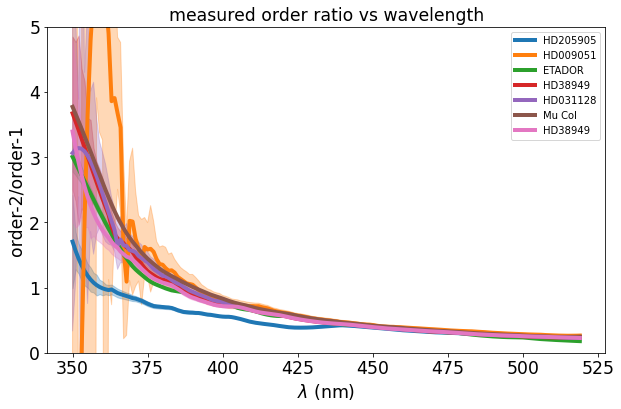

In [22]:
sns.color_palette("hls", N)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for count,df in enumerate(all_df):
    wl    = df["lambdas"] 
    ratio = df["ratioo2o1"] 
    ratioerr = df["ratioo2o1err"]
    exposure = exposure_list[count]
    target   = Exposure_to_target[exposure] 
    #if count != 1:
    if count >= 0:
        c=ax.plot(wl,ratio,label=target,lw=4)
        ax.fill_between(wl, ratio-ratioerr , ratio + ratioerr,color=c[0].get_color(), alpha=0.3)
    
   
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order-2/order-1")
ax.legend()
ax.set_ylim(0,5.)
ax.set_title("measured order ratio vs wavelength")    

# Interpolate ratio and errors

In [23]:
all_func_ratio = []
all_func_ratioerr = []

for count,df in enumerate(all_df):
    wl    = df["lambdas"] 
    ratio = df["ratioo2o1"] 
    ratioerr = df["ratioo2o1err"]
    exposure = exposure_list[count]
    target   = Exposure_to_target[exposure] 

    all_func_ratio.append(interpolate.interp1d(wl,ratio,bounds_error=False,fill_value="extrapolate")) 
    all_func_ratioerr.append(interpolate.interp1d(wl,ratioerr,bounds_error=False,fill_value="extrapolate")) 

In [24]:
WL = np.arange(350.,525)

Text(0.5, 1.0, 'interpolated order ratio vs wavelength')

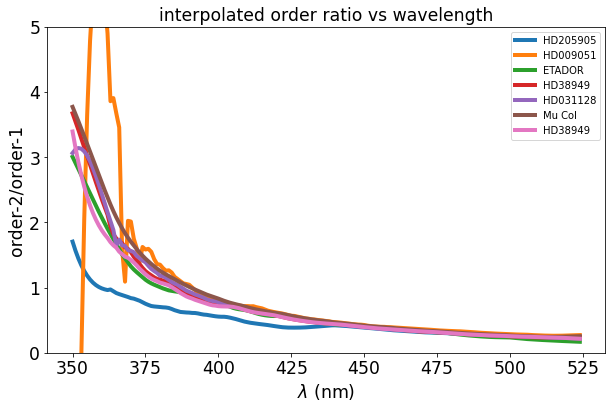

In [25]:
# Average
sns.color_palette("hls", N)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for count,func in enumerate(all_func_ratio):
    exposure = exposure_list[count]
    target   = Exposure_to_target[exposure] 
    #if count >= 2:
    if count >= 0:
        ax.plot(WL,func(WL),label=target,lw=4)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order-2/order-1")
ax.legend()
ax.set_ylim(0,5.)
ax.set_title("interpolated order ratio vs wavelength")
    

Text(0.5, 1.0, 'interpolated order ratio error vs wavelength')

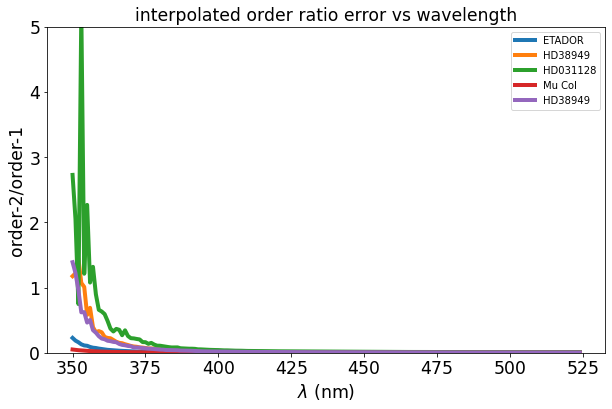

In [26]:
# Error
sns.color_palette("hls", N)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for count,func in enumerate(all_func_ratioerr):
    exposure = exposure_list[count]
    target   = Exposure_to_target[exposure] 
    if count >= 2:
        ax.plot(WL,func(WL),label=target,lw=4)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order-2/order-1")
ax.legend()
ax.set_ylim(0,5.)
ax.set_title("interpolated order ratio error vs wavelength")
    

# Compute average

https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy

In [27]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    
    weight should be 1/sigma^2
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))


np.sqrt(np.cov(values, aweights=weights))

In [28]:
def weighted_sample_avg_std(values, weights):
    """
    Return the weighted average and weighted sample standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    
    weight should be 1/sigma^2
    
    Assumes that weights contains only integers (e.g. how many samples in each group).
    
    See also https://en.wikipedia.org/wiki/Weighted_arithmetic_mean#Frequency_weights
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    variance = variance*sum(weights)/(sum(weights)-1)
    return (average, sqrt(variance))


In [29]:
values = [1,2]
weight = [1,5]

In [30]:
weighted_avg_and_std(values,weight)

(1.8333333333333333, 0.3726779962499649)

In [31]:
(1*1+2*5)/6

1.8333333333333333

In [32]:
np.vstack([values,weight])

array([[1, 2],
       [1, 5]])

In [33]:
ratio_list  = [ func(WL) for func in all_func_ratio ]
ratioerr_list  = [ func(WL) for func in all_func_ratioerr ]

In [34]:
ratio_stacked = np.vstack(ratio_list)
ratioerr_stacked = np.vstack(ratioerr_list)

In [35]:
ratio_stacked.shape

(7, 175)

In [36]:
means = np.average(ratio_stacked, weights=1/ratioerr_stacked**2,axis=0)

In [37]:
variances = np.average((ratio_stacked-means)**2, weights=1/ratioerr_stacked**2,axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Measured order ratio error vs wavelength')

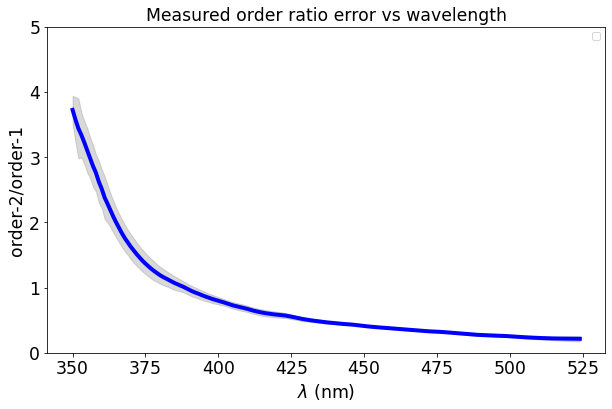

In [38]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.fill_between(WL, means-np.sqrt(variances) , means + np.sqrt(variances) ,color="gray", alpha=0.3)
ax.plot(WL,means,'b-',lw=4)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order-2/order-1")
ax.legend()
ax.set_ylim(0,5.)
ax.set_title("Measured order ratio error vs wavelength")

# Compare average with data

Text(0.5, 1.0, 'interpolated order ratio vs wavelength')

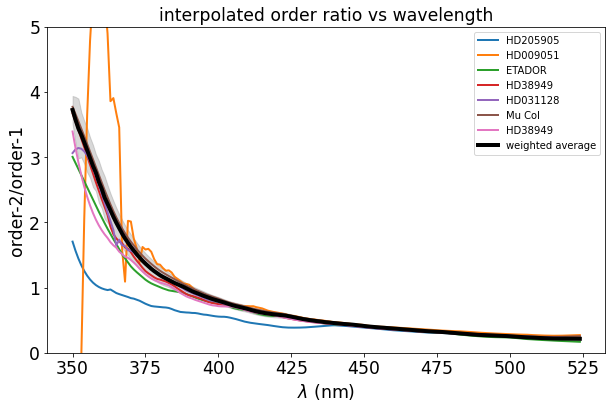

In [44]:
# Average
sns.color_palette("hls", N)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for count,func in enumerate(all_func_ratio):
    exposure = exposure_list[count]
    target   = Exposure_to_target[exposure] 
    #if count >= 2
    if count >= 0:
        ax.plot(WL,func(WL),label=target,lw=2)
        
ax.fill_between(WL, means-np.sqrt(variances) , means + np.sqrt(variances) ,color="gray", alpha=0.3)
ax.plot(WL,means,'k-',lw=4,label="weighted average")

ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order-2/order-1")
ax.legend()
ax.set_ylim(0,5.)
ax.set_title("interpolated order ratio vs wavelength")
    

# Save output

In [40]:
filename_out = "order2order1_summary_BG40.csv" 

In [41]:
df_out = pd.DataFrame()

In [42]:
df_out["lambdas"]   = WL
df_out["ratioo2o1"] = means
df_out["ratioo2o1err"] = np.sqrt(variances)

In [43]:
df_out.to_csv(filename_out)